In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import pearsonr, spearmanr
import warnings


In [2]:
# Set up plotting style
plt.style.use('default')
sns.set_palette("husl")

In [20]:
#df = pd.read_csv('/ibmm_data2/oas_database/paired_lea_tmp/paired_model/immuno_match/immunomatch_results/pairing_result_bert2gpt_full_complete_ids_mapping_unique_nt_trimmed_gene_hit_locus.csv')
#df = pd.read_csv("/ibmm_data2/oas_database/paired_lea_tmp/paired_model/BERT2GPT/multiple_light_seqs_from_single_heavy/full_test_set_multiple_light_seqs/pairing_result_matching_seqs_multiple_light_seqs_203276_cls_predictions_parsed_reformatted_rel_cols.csv")
df = pd.read_csv("/ibmm_data2/oas_database/paired_lea_tmp/paired_model/BERT2GPT/multiple_light_seqs_from_single_heavy/full_test_set_multiple_light_seqs/pairing_result_non_matching_seqs_multiple_light_seqs_203276_cls_predictions_parsed_reformatted_rel_cols.csv")

In [22]:
import pandas as pd

# Read CSVs
# df1 = pd.read_csv('/ibmm_data2/oas_database/paired_lea_tmp/paired_model/BERT2GPT/multiple_light_seqs_from_single_heavy/pairing_result_matching_prediction_full_eval_generate_multiple_light_seqs_203276_10k_predictions_parsed_reformatted_rel_cols.csv')
# df2 = pd.read_csv('/ibmm_data2/oas_database/paired_lea_tmp/paired_model/BERT2GPT/multiple_light_seqs_from_single_heavy/matching_prediction_full_eval_generate_multiple_light_seqs_203276_10k_predictions_parsed_reformatted_more_rel_cols.csv')
# df2 = pd.read_csv('/ibmm_data2/oas_database/paired_lea_tmp/paired_model/BERT2GPT/multiple_light_seqs_from_single_heavy/matching_prediction_full_eval_generate_multiple_light_seqs_203276_10k_predictions.csv')

df1 = pd.read_csv('/ibmm_data2/oas_database/paired_lea_tmp/paired_model/BERT2GPT/multiple_light_seqs_from_single_heavy/full_test_set_multiple_light_seqs/pairing_result_non_matching_seqs_multiple_light_seqs_203276_cls_predictions_parsed_reformatted_rel_cols.csv')
#df2 = pd.read_csv('/ibmm_data2/oas_database/paired_lea_tmp/paired_model/BERT2GPT/multiple_light_seqs_from_single_heavy/matching_prediction_full_eval_generate_multiple_light_seqs_203276_10k_predictions_parsed_reformatted_more_rel_cols.csv')
df2 = pd.read_csv('/ibmm_data2/oas_database/paired_lea_tmp/paired_model/BERT2GPT/multiple_light_seqs_from_single_heavy/full_test_set_multiple_light_seqs/non_matching_seqs_multiple_light_seqs_203276_cls_predictions.csv')

#Unnamed: 0,overall_id,heavy_raw_sequence,true_light_raw_sequence,true_light_first_hit_gene,true_light_gene_name,true_light_light_locus,gen_light_1_raw_sequence,gen_light_1_nt_trimmed,gen_light_1_first_hit_gene,gen_light_1_light_locus,pairing_scores,true_v_gene_simple,true_v_gene_family_call,gen_v_gene_simple,gen_v_gene_family_call
# heavy_chain_number,gen_light_chain_number,true_light_seq,gen_light_seq,input_heavy_seq,BLOSUM,similarity,perplexity,label,predicted_true_light_seq_label,predicted_gen_light_seq_label,predicted_input_heavy_seq_label

print(f"File 1: {len(df1)} rows")
print(f"File 2: {len(df2)} rows")

# Merge on matching columns
merged = df1.merge(df2, 
                   left_on=['overall_id', 'true_light_raw_sequence','heavy_raw_sequence', 'gen_light_1_raw_sequence'],
                   right_on=['heavy_chain_number', 'true_light_seq', 'input_heavy_seq', 'gen_light_seq'],
                   how='left')

print(f"Merged: {len(merged)} rows")
print(f"Matched rows: {merged.dropna().shape[0]}")
print(f"Unmatched rows: {merged.isnull().any(axis=1).sum()}")


File 1: 46081 rows
File 2: 246985 rows
Merged: 47303 rows
Matched rows: 47301
Unmatched rows: 2


In [23]:
merged 

,Unnamed: 0,overall_id,heavy_raw_sequence,true_light_raw_sequence,true_light_first_hit_gene,true_light_gene_name,true_light_light_locus,gen_light_1_raw_sequence,gen_light_1_nt_trimmed,gen_light_1_first_hit_gene,...,true_light_seq,gen_light_seq,input_heavy_seq,BLOSUM,similarity,perplexity,label,predicted_true_light_seq_label,predicted_gen_light_seq_label,predicted_input_heavy_seq_label
0,0,2,QLQLQESGPGLVKPSETLSLICSVSGGSITTSSYYWAWIRQSPGKG...,QSALTQPASVSGSPGQSITISCSGTSDDIGDYNYVSWYQQHPGKAP...,IGLV2-14*03 unnamed protein product,IGLV2-14*03,IGL,DIVMTQSPDSLAVSLGERATINCKSSQSVLYSSDNKNYLGWYQQKP...,DIVMTQSPDSLAVSLGERATINCKSSQSVLYSSDNKNYLGWYQQKP...,IGKV3-20*01 unnamed protein product,...,QSALTQPASVSGSPGQSITISCSGTSDDIGDYNYVSWYQQHPGKAP...,DIVMTQSPDSLAVSLGERATINCKSSQSVLYSSDNKNYLGWYQQKP...,QLQLQESGPGLVKPSETLSLICSVSGGSITTSSYYWAWIRQSPGKG...,231.0,48.672566,2.674142,0,1,0,1
1,0,1,QLQVQESGPGLVKPSETLSLTCTVSGASSSIKKYYWGWIRQSPGKG...,DIQMTQSPSTLSASVGDRVTITCRASHSINTWLAWYQQKPGKAPKL...,IGKV1-5*03 unnamed protein product,IGKV1-5*03,IGK,SSELTQDPAVSVALGQTVRITCQGDSLRSYYASWYQQKPGQAPLLV...,SSELTQDPAVSVALGQTVRITCQGDSLRSYYASWYQQKPGQAPLLV...,IGLV3-19*01 unnamed protein product,...,DIQMTQSPSTLSASVGDRVTITCRASHSINTWLAWYQQKPGKAPKL...,SSELTQDPAVSVALGQTVRITCQGDSLRSYYASWYQQKPGQAPLLV...,QLQVQESGPGLVKPSETLSLTCTVSGASSSIKKYYWGWIRQSPGKG...,204.0,39.814815,2.466424,0,1,0,1
2,1,6,QVQLVESGGGVVQPGRSLRLSCAASGFTFSSHGLHWVRQAPGKGLE...,QSALTQPASVSGSPGQSITISCTGTSSDVGLYNLVSWYQQHPGKVL...,IGLV2-23*02 unnamed protein product,IGLV2-23*02,IGL,QAVVTQEPSLTVSPGGTVTLTCGSSTGAVTSGHYPYWFQQKPGQAP...,QAVVTQEPSLTVSPGGTVTLTCGSSTGAVTSGHYPYWFQQKPGQAP...,IGLV7-46*01 unnamed protein product,...,QSALTQPASVSGSPGQSITISCTGTSSDVGLYNLVSWYQQHPGKVL...,QAVVTQEPSLTVSPGGTVTLTCGSSTGAVTSGHYPYWFQQKPGQAP...,QVQLVESGGGVVQPGRSLRLSCAASGFTFSSHGLHWVRQAPGKGLE...,239.0,45.535714,2.592940,0,1,0,1
3,1,3,EVQLVESGGDLVRPGGSLRLSCAASGFPFSRAWMTWVRQAPGKGLD...,DIQMTQSPSSLSAFMGDRVTITCRASQSPKTYLHWYQQRPGGVPKL...,IGKV1-39*01 unnamed protein product,IGKV1-39*01,IGK,EIVLTQSPGTLSLSPGERATLSCRASQSVSRSYFAWYQQKPGQAPR...,EIVLTQSPGTLSLSPGERATLSCRASQSVSRSYFAWYQQKPGQAPR...,IGKV3-20*01 unnamed protein product,...,DIQMTQSPSSLSAFMGDRVTITCRASQSPKTYLHWYQQRPGGVPKL...,EIVLTQSPGTLSLSPGERATLSCRASQSVSRSYFAWYQQKPGQAPR...,EVQLVESGGDLVRPGGSLRLSCAASGFPFSRAWMTWVRQAPGKGLD...,332.0,59.259259,3.344425,0,1,0,1
4,2,7,QEQVMESGGGVVQPGRSLRLSCEASGFSFRNYGMHWVRQAPGRGLE...,QSALTQPASVSGSPGQSITISCTGTSSDVIGYNYVSWYQQHPGRAP...,IGLV2-14*03 unnamed protein product,IGLV2-14*03,IGL,QSVLTQPPSVSGAPGQRVTISCTGSSSNIGAGYDVHWYQQLPGTAP...,QSVLTQPPSVSGAPGQRVTISCTGSSSNIGAGYDVHWYQQLPGTAP...,IGLV1-40*01 unnamed protein product,...,QSALTQPASVSGSPGQSITISCTGTSSDVIGYNYVSWYQQHPGRAP...,QSVLTQPPSVSGAPGQRVTISCTGSSSNIGAGYDVHWYQQLPGTAP...,QEQVMESGGGVVQPGRSLRLSCEASGFSFRNYGMHWVRQAPGRGLE...,369.0,68.468468,2.542411,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47298,30405,58830,EMQLVESGGGLVQPGGSLRLSCAASGFTFSDYYMQWVRQAPGKGPE...,DIVMTQSPLSLPVTPGEPASISCRSSQSLLASDAYNYIDWYLQKPG...,IGKV2-28*01 unnamed protein product,IGKV2-28*01,IGK,DIVMTQSPDSLAVSLGERATINCKSSQSVLYSSNNKNYLAWYQQKP...,DIVMTQSPDSLAVSLGERATINCKSSQSVLYSSNNKNYLAWYQQKP...,IGKV1-27*01 unnamed protein product,...,DIVMTQSPLSLPVTPGEPASISCRSSQSLLASDAYNYIDWYLQKPG...,DIVMTQSPDSLAVSLGERATINCKSSQSVLYSSNNKNYLAWYQQKP...,EMQLVESGGGLVQPGGSLRLSCAASGFTFSDYYMQWVRQAPGKGPE...,376.0,68.141593,2.646646,0,1,0,1
47299,30406,58831,QVQLLESGGGVVQPGGSLRLSCAASGFAFSIYDMNWVRQAPGKGLE...,DIQMTQSPSSLSASVGDRVTITCRASQDIHGYLNWYQQKPGKAPKL...,IGKV1-39*01 unnamed protein product,IGKV1-39*01,IGK,EIVLTQSPGTLSLSPGERATLSCRASQSVSSSYLAWYQQKPGQAPR...,EIVLTQSPGTLSLSPGERATLSCRASQSVSSSYLAWYQQKPGQAPR...,IGKV3-20*01 unnamed protein product,...,DIQMTQSPSSLSASVGDRVTITCRASQDIHGYLNWYQQKPGKAPKL...,EIVLTQSPGTLSLSPGERATLSCRASQSVSSSYLAWYQQKPGQAPR...,QVQLLESGGGVVQPGGSLRLSCAASGFAFSIYDMNWVRQAPGKGLE...,372.0,65.454545,2.537441,0,1,0,1
47300,30407,58834,EVQLVESGGGLVQPGGSLRLSCAASGFIFSSFGMHWVRKAPGKGLE...,DIQMTQSPSSLSASVGDRVTITCKSSLSLLNSGNQKNYLTWYQEKP...,IGKV1-39*01 unnam

In [6]:

print("Dataset shape:", merged.shape)
print("\nFirst few rows:")
print(merged.head())


Dataset shape: (56174, 28)

First few rows:
   Unnamed: 0  overall_id                                 heavy_raw_sequence  \
0           0           2  QLQLQESGPGLVKPSETLSLICSVSGGSITTSSYYWAWIRQSPGKG...   
1           0           1  QLQVQESGPGLVKPSETLSLTCTVSGASSSIKKYYWGWIRQSPGKG...   
2           1           4  EVQLLESGGGLVQPGGSLRLSCAASGFNFANYDMSWVRQAPGKGLE...   
3           1           3  EVQLVESGGDLVRPGGSLRLSCAASGFPFSRAWMTWVRQAPGKGLD...   
4           2           5  QVQLQESGPGLVKPSGTLSLTCVVSGGSISTNNWWSWVRQPPGKGL...   

                             true_light_raw_sequence  \
0  QSALTQPASVSGSPGQSITISCSGTSDDIGDYNYVSWYQQHPGKAP...   
1  DIQMTQSPSTLSASVGDRVTITCRASHSINTWLAWYQQKPGKAPKL...   
2  QTVVTQEPSFSVSPGGTVTLTCGLSSGSVSTKYYPSWYQQTPGQAP...   
3  DIQMTQSPSSLSAFMGDRVTITCRASQSPKTYLHWYQQRPGGVPKL...   
4  EIVLTQSPGTLSLSPGERATLSCRASQSISNTYLAWYRQKPGQAPR...   

             true_light_first_hit_gene true_light_gene_name  \
0  IGLV2-14*03 unnamed protein product          IGLV2-14*03   
1   IGKV1-5*

In [7]:
# Check for the specific columns we need
required_columns = ['similarity', 'pairing_scores']
missing_columns = [col for col in required_columns if col not in merged.columns]

if missing_columns:
    print(f"\nWarning: Missing columns: {missing_columns}")
    print("Available columns:", list(merged.columns))
else:
    print("\nBoth required columns found!")



Both required columns found!


In [24]:

# Extract the two columns for analysis
x = merged['similarity']
y = merged['pairing_scores']

# Basic descriptive statistics
print("\n" + "="*50)
print("DESCRIPTIVE STATISTICS")
print("="*50)

print("\nCalculated Similarity:")
print(f"  Count: {x.count()}")
print(f"  Mean: {x.mean():.4f}")
print(f"  Std: {x.std():.4f}")
print(f"  Min: {x.min():.4f}")
print(f"  Max: {x.max():.4f}")
print(f"  Missing values: {x.isnull().sum()}")

print("\nPairing Scores:")
print(f"  Count: {y.count()}")
print(f"  Mean: {y.mean():.4f}")
print(f"  Std: {y.std():.4f}")
print(f"  Min: {y.min():.4f}")
print(f"  Max: {y.max():.4f}")
print(f"  Missing values: {y.isnull().sum()}")

# Remove rows where either column has missing values
#clean_data = df[['calculated_similarity', 'pairing_scores']].dropna()
x_clean = merged['similarity']
y_clean = merged['pairing_scores']

print(f"\nSample size after removing missing values: {len(merged)}")

# Correlation Analysis
print("\n" + "="*50)
print("CORRELATION ANALYSIS")
print("="*50)

# Pearson correlation (linear relationship)
pearson_corr, pearson_p = pearsonr(x_clean, y_clean)
print(f"\nPearson Correlation:")
print(f"  Coefficient: {pearson_corr:.4f}")
print(f"  P-value: {pearson_p:.4e}")
print(f"  Significance: {'Significant' if pearson_p < 0.05 else 'Not significant'} (α = 0.05)")

# Spearman correlation (monotonic relationship)
spearman_corr, spearman_p = spearmanr(x_clean, y_clean)
print(f"\nSpearman Correlation:")
print(f"  Coefficient: {spearman_corr:.4f}")
print(f"  P-value: {spearman_p:.4e}")
print(f"  Significance: {'Significant' if spearman_p < 0.05 else 'Not significant'} (α = 0.05)")

# Interpretation of correlation strength
def interpret_correlation(corr):
    abs_corr = abs(corr)
    if abs_corr < 0.1:
        return "negligible"
    elif abs_corr < 0.3:
        return "weak"
    elif abs_corr < 0.5:
        return "moderate"
    elif abs_corr < 0.7:
        return "strong"
    else:
        return "very strong"

print(f"\nCorrelation Strength Interpretation:")
print(f"  Pearson: {interpret_correlation(pearson_corr)} correlation")
print(f"  Spearman: {interpret_correlation(spearman_corr)} correlation")



DESCRIPTIVE STATISTICS

Calculated Similarity:
  Count: 47303
  Mean: 60.0516
  Std: 14.9836
  Min: 25.8929
  Max: 100.0000
  Missing values: 0

Pairing Scores:
  Count: 47303
  Mean: 0.3677
  Std: 0.3486
  Min: 0.0000
  Max: 0.9941
  Missing values: 0

Sample size after removing missing values: 47303

CORRELATION ANALYSIS

Pearson Correlation:
  Coefficient: 0.0462
  P-value: 9.6527e-24
  Significance: Significant (α = 0.05)

Spearman Correlation:
  Coefficient: 0.0526
  P-value: 2.7294e-30
  Significance: Significant (α = 0.05)

Correlation Strength Interpretation:
  Pearson: negligible correlation
  Spearman: negligible correlation


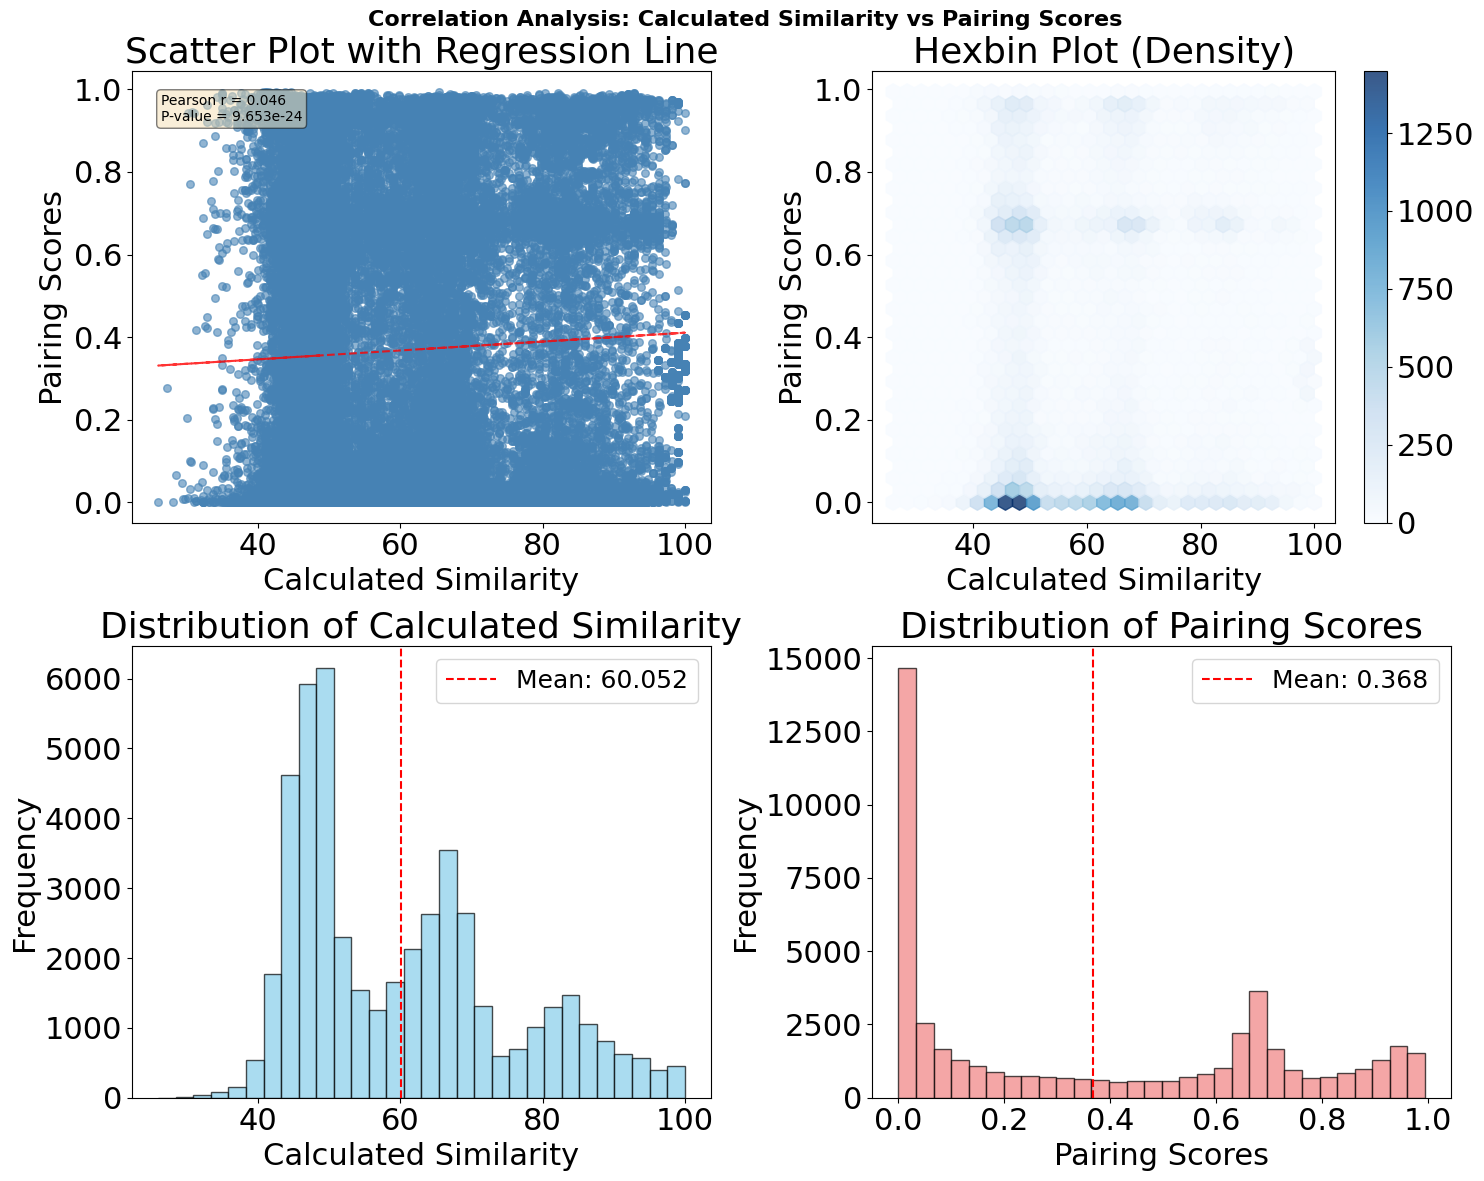

In [25]:
# Create comprehensive visualization
fig, axes = plt.subplots(2, 2, figsize=(15, 12))
fig.suptitle('Correlation Analysis: Calculated Similarity vs Pairing Scores', fontsize=16, fontweight='bold')

# 1. Scatter plot with regression line
axes[0,0].scatter(x_clean, y_clean, alpha=0.6, color='steelblue', s=30)
axes[0,0].set_xlabel('Calculated Similarity')
axes[0,0].set_ylabel('Pairing Scores')
axes[0,0].set_title('Scatter Plot with Regression Line')

# Add regression line
z = np.polyfit(x_clean, y_clean, 1)
p = np.poly1d(z)
axes[0,0].plot(x_clean, p(x_clean), "r--", alpha=0.8)

# Add correlation info to plot
axes[0,0].text(0.05, 0.95, f'Pearson r = {pearson_corr:.3f}\nP-value = {pearson_p:.3e}', 
               transform=axes[0,0].transAxes, verticalalignment='top',
               bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))

# 2. Hexbin plot for density
hb = axes[0,1].hexbin(x_clean, y_clean, gridsize=30, cmap='Blues', alpha=0.8)
axes[0,1].set_xlabel('Calculated Similarity')
axes[0,1].set_ylabel('Pairing Scores')
axes[0,1].set_title('Hexbin Plot (Density)')
plt.colorbar(hb, ax=axes[0,1])

# 3. Distribution plots
axes[1,0].hist(x_clean, bins=30, alpha=0.7, color='skyblue', edgecolor='black')
axes[1,0].set_xlabel('Calculated Similarity')
axes[1,0].set_ylabel('Frequency')
axes[1,0].set_title('Distribution of Calculated Similarity')
axes[1,0].axvline(x_clean.mean(), color='red', linestyle='--', label=f'Mean: {x_clean.mean():.3f}')
axes[1,0].legend()

axes[1,1].hist(y_clean, bins=30, alpha=0.7, color='lightcoral', edgecolor='black')
axes[1,1].set_xlabel('Pairing Scores')
axes[1,1].set_ylabel('Frequency')
axes[1,1].set_title('Distribution of Pairing Scores')
axes[1,1].axvline(y_clean.mean(), color='red', linestyle='--', label=f'Mean: {y_clean.mean():.3f}')
axes[1,1].legend()

plt.tight_layout()
plt.show()


Mean of Pairing Scores: 0.3677


Text(0.5, 1.0, 'Distribution of Pairing Scores with Mean Line')

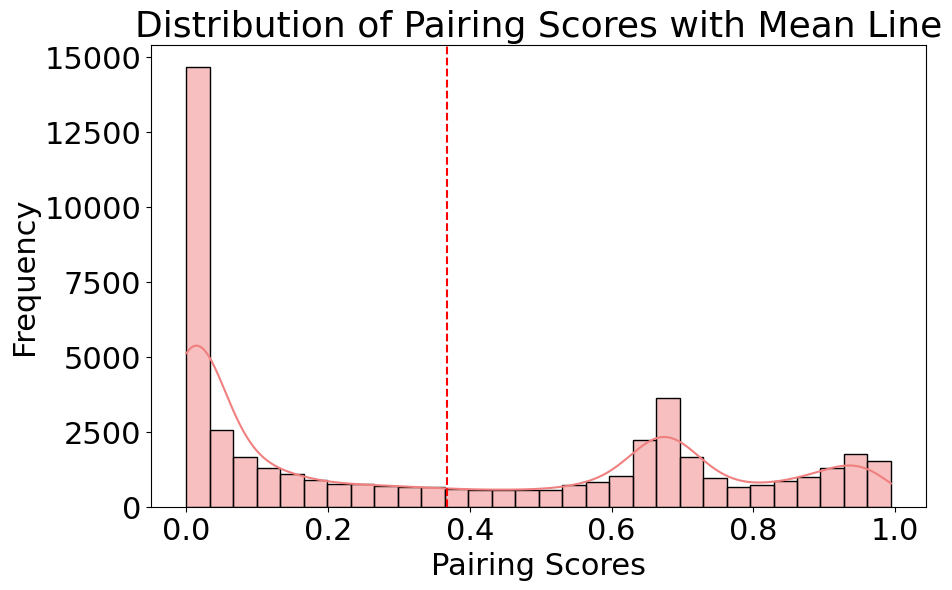

In [26]:
# calculate mean of y_clean
mean_y = y_clean.mean()
print(f"\nMean of Pairing Scores: {mean_y:.4f}")

# plot distribution of y_clean
plt.figure(figsize=(10, 6))
sns.histplot(y_clean, bins=30, kde=True, color='lightcoral', edgecolor='black')
plt.axvline(mean_y, color='red', linestyle='--', label=f'Mean: {mean_y:.4f}')
plt.xlabel('Pairing Scores')
plt.ylabel('Frequency')
plt.title('Distribution of Pairing Scores with Mean Line')

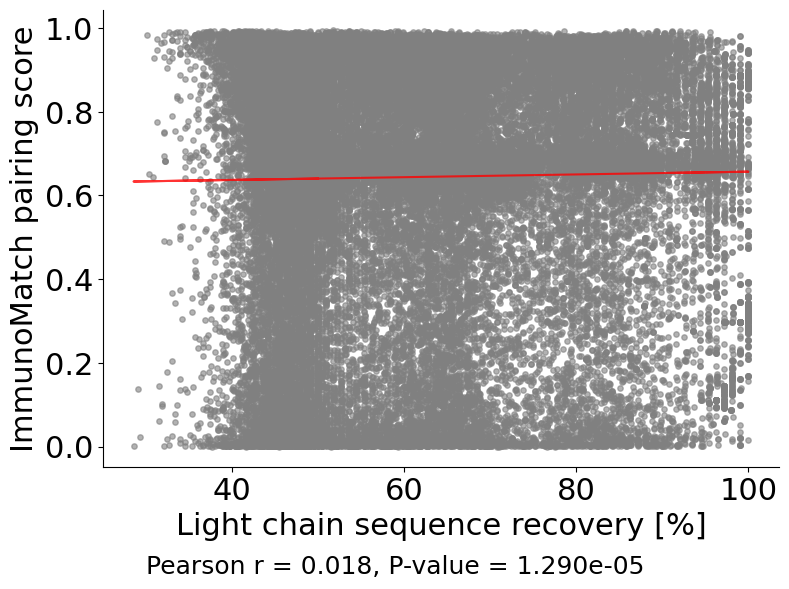

In [42]:
# Set custom font sizes
plt.rcParams.update({
    'axes.titlesize': 26,
    'axes.labelsize': 22,
    'xtick.labelsize': 22,
    'ytick.labelsize': 22,
    'legend.fontsize': 18,        # Legend values font size
    'legend.title_fontsize': 18   # Legend title font size
})


# Create scatter plot with regression line
plt.figure(figsize=(8, 6))

# Scatter plot
plt.scatter(x_clean, y_clean, alpha=0.6, color='grey', s=15)

# Add regression line
z = np.polyfit(x_clean, y_clean, 1)
p = np.poly1d(z)
plt.plot(x_clean, p(x_clean), "r-", alpha=0.8, linewidth=1.5)

# remove upper horizontal line and right vertical line
sns.despine()


# Labels and title
plt.xlabel('Light chain sequence recovery [%]')
plt.ylabel('ImmunoMatch pairing score')

# # Add correlation info to plot
# plt.text(0.05, 0.95, f'Pearson r = {pearson_corr:.3f}\nP-value = {pearson_p:.3e}', 
#          transform=plt.gca().transAxes, verticalalignment='top',
#          bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.7),
#          fontsize=18)

# plt.figtext(0.5, 0.001, f'Pearson r = {pearson_corr:.3f}, P-value = {pearson_p:.3e}', 
#             ha='center', fontsize=18, 
#             bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.7))


# Option 2: Add as subtitle (comment out Option 1 and uncomment this)
plt.suptitle(f'Pearson r = {pearson_corr:.3f}, P-value = {pearson_p:.3e}', 
             y=0.001, fontsize=18)

# # Option 3: Add to the right side of the plot (comment out Option 1 and uncomment this)
# plt.figtext(0.95, 0.5, f'Pearson r = {pearson_corr:.3f}\nP-value = {pearson_p:.3e}', 
#             ha='left', va='center', fontsize=18,
#             bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.7))

plt.tight_layout()
#plt.savefig('pairing_result_matching_seqs_multiple_light_seqs_203276_cls_predictions_parsed_reformatted_rel_cols_2.png', dpi=600, bbox_inches='tight', transparent=True)
plt.show()

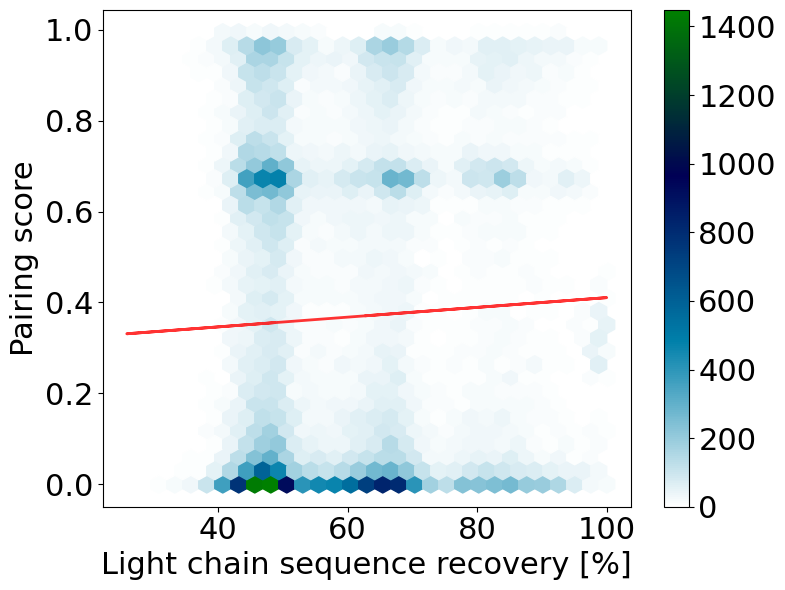

In [ ]:
# Set custom font sizes
plt.rcParams.update({
    'axes.titlesize': 26,
    'axes.labelsize': 22,
    'xtick.labelsize': 22,
    'ytick.labelsize': 22,
    'legend.fontsize': 18,        # Legend values font size
    'legend.title_fontsize': 18   # Legend title font size
})

# Create hexbin plot with regression line
plt.figure(figsize=(8, 6))

# Create hexbin plot instead of scatter
hb = plt.hexbin(x_clean, y_clean, gridsize=30, cmap='ocean_r')

# Add colorbar
cbar = plt.colorbar(hb)
cbar.set_label('', rotation=270, labelpad=20)

# Add regression line
z = np.polyfit(x_clean, y_clean, 1)
p = np.poly1d(z)
# plt.plot(x_clean, p(x_clean), "r-", alpha=0.8, linewidth=2, 
#          label=f'Linear Fit\n(PCC: {pearson_corr:.4f})')

plt.plot(x_clean, p(x_clean), "r-", alpha=0.8, linewidth=2)

# Labels and title
plt.xlabel('Light chain sequence recovery [%]')
plt.ylabel('Pairing score')

# Add legend for the regression line.
#plt.legend(loc='upper left', frameon=True, fancybox=True, shadow=True)




plt.tight_layout()
plt.savefig('ocean_r_pairing_result_non_matching_seqs_multiple_light_seqs_203276_cls_predictions_parsed_reformatted_rel_cols_2.png', dpi=600, bbox_inches='tight', transparent=True)
plt.show()


RESIDUAL ANALYSIS
Linear Regression:
  Slope: 0.0042
  Intercept: 0.1613
  R-squared: 0.0348
  Standard Error: 0.0002


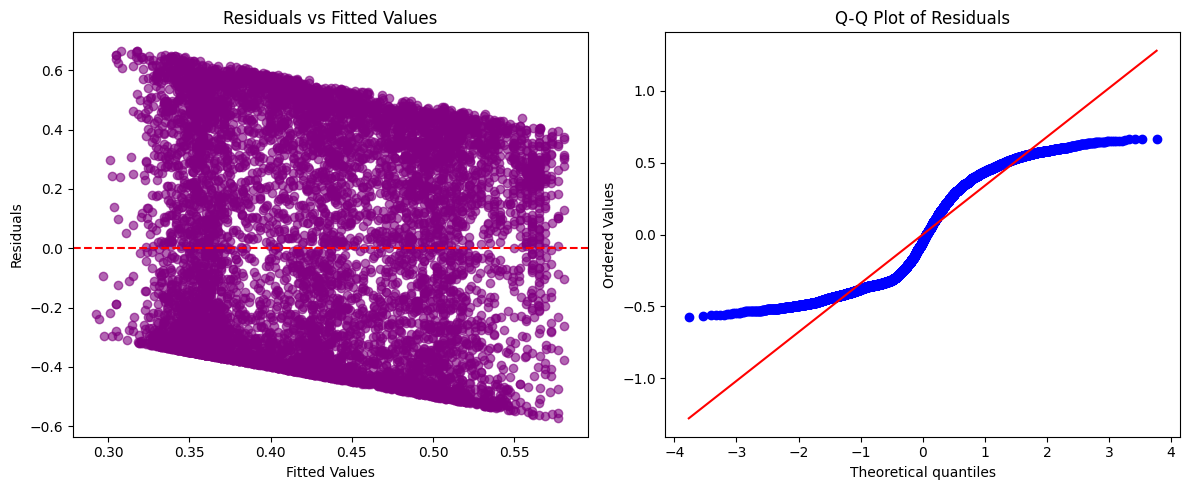


SUMMARY REPORT

Analysis of the relationship between Calculated Similarity and Pairing Scores:

Sample Size: 8388 observations

Correlation Results:
- Pearson correlation: 0.1865 (weak)
- Spearman correlation: 0.1827 (weak)

Statistical Significance:
- Pearson p-value: 1.5890e-66 (Significant)
- Spearman p-value: 7.5577e-64 (Significant)

Linear Regression:
- R-squared: 0.0348 (3.5% of variance explained)
- Equation: y = 0.0042x + 0.1613

Interpretation:

- The relationship appears to be primarily linear
- The correlation is highly statistically significant (p < 0.001)
- There is a positive relationship: as calculated_similarity increases, pairing_scores tend to increase


In [10]:



# Additional Analysis: Residuals
print("\n" + "="*50)
print("RESIDUAL ANALYSIS")
print("="*50)

# Calculate residuals
slope, intercept, r_value, p_value, std_err = stats.linregress(x_clean, y_clean)
predicted_y = slope * x_clean + intercept
residuals = y_clean - predicted_y

print(f"Linear Regression:")
print(f"  Slope: {slope:.4f}")
print(f"  Intercept: {intercept:.4f}")
print(f"  R-squared: {r_value**2:.4f}")
print(f"  Standard Error: {std_err:.4f}")

# Plot residuals
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

# Residuals vs fitted values
ax1.scatter(predicted_y, residuals, alpha=0.6, color='purple')
ax1.axhline(y=0, color='red', linestyle='--')
ax1.set_xlabel('Fitted Values')
ax1.set_ylabel('Residuals')
ax1.set_title('Residuals vs Fitted Values')

# Q-Q plot for normality of residuals
stats.probplot(residuals, dist="norm", plot=ax2)
ax2.set_title('Q-Q Plot of Residuals')

plt.tight_layout()
plt.show()

# Summary Report
print("\n" + "="*50)
print("SUMMARY REPORT")
print("="*50)

print(f"""
Analysis of the relationship between Calculated Similarity and Pairing Scores:

Sample Size: {len(clean_data)} observations

Correlation Results:
- Pearson correlation: {pearson_corr:.4f} ({interpret_correlation(pearson_corr)})
- Spearman correlation: {spearman_corr:.4f} ({interpret_correlation(spearman_corr)})

Statistical Significance:
- Pearson p-value: {pearson_p:.4e} ({'Significant' if pearson_p < 0.05 else 'Not significant'})
- Spearman p-value: {spearman_p:.4e} ({'Significant' if spearman_p < 0.05 else 'Not significant'})

Linear Regression:
- R-squared: {r_value**2:.4f} ({r_value**2*100:.1f}% of variance explained)
- Equation: y = {slope:.4f}x + {intercept:.4f}

Interpretation:
""")

if abs(pearson_corr) > abs(spearman_corr):
    print("- The relationship appears to be primarily linear")
else:
    print("- The relationship appears to be more monotonic than linear")

if pearson_p < 0.001:
    print("- The correlation is highly statistically significant (p < 0.001)")
elif pearson_p < 0.01:
    print("- The correlation is statistically significant (p < 0.01)")
elif pearson_p < 0.05:
    print("- The correlation is statistically significant (p < 0.05)")
else:
    print("- The correlation is not statistically significant (p ≥ 0.05)")

if pearson_corr > 0:
    print("- There is a positive relationship: as calculated_similarity increases, pairing_scores tend to increase")
else:
    print("- There is a negative relationship: as calculated_similarity increases, pairing_scores tend to decrease")